This notebook will analyze

1. the number of responses recorded in the CSVs
2. the number of responses recorded in `info.png`.

In [5]:
import os
import utils

In [6]:
def get_info(filename):
    contest = int(filename[:3])
    df = utils.read_responses(filename)
    return {'responses': len(df), 'contest': contest, 'filename': filename}

In [7]:
data = []
for filename in os.listdir('../contests/responses/'):
    if 'Store' in filename or any(d in filename for d in ['497', '499', 'dueling']):
        continue
    data += [get_info(filename)]

In [18]:
import pandas as pd
df = pd.DataFrame(data)

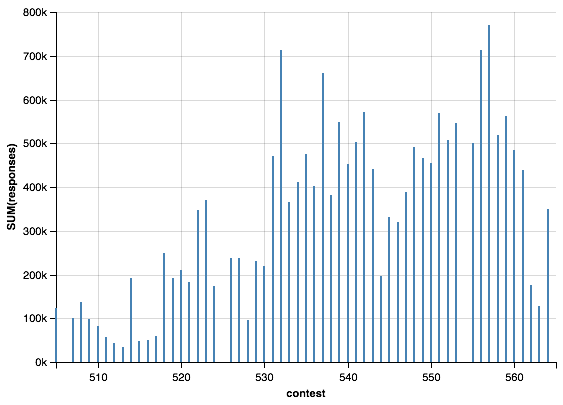

In [19]:
from altair import Chart, X, Y, Scale
Chart(df).mark_bar().encode(
    x=X('contest', scale=Scale(zero=False)),
    y='sum(responses)')

In [16]:
df['responses'].sum() / 1e6

19.089317